In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
dataset=pd.read_csv('dataset')

In [35]:
dataset.head()

,Unnamed: 0,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,Status
0,0,68,0,0,0,3,4,24,1,60,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
1,1,50,1,1,2,2,35,14,5,62,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
2,2,58,2,2,4,2,63,14,7,75,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
3,3,58,0,0,0,3,18,2,1,84,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4,4,47,1,0,1,3,41,3,1,50,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1


Splitting data to test-train

In [36]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Using StandardScaler to transform data

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

K-Nearest-Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Predicting Test results

In [68]:
y_pred=knn.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score

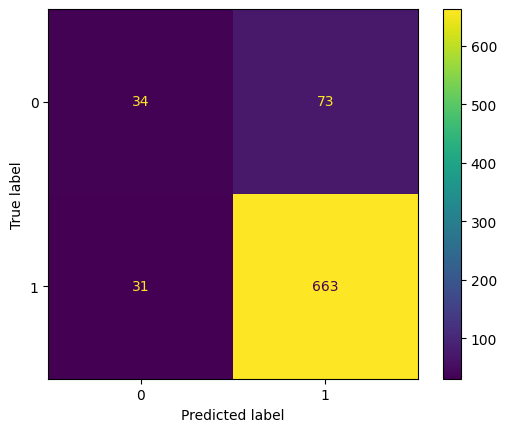

In [70]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [71]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8701622971285893
0.9008152173913043


Accuracy score: 0.87
Precision score: 0.90


Let's increase neighbors and test which metric is the best

In [85]:
table=[]
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    prc=precision_score(y_test, y_pred)
    metrics=(acc,prc)
    table.append(metrics)

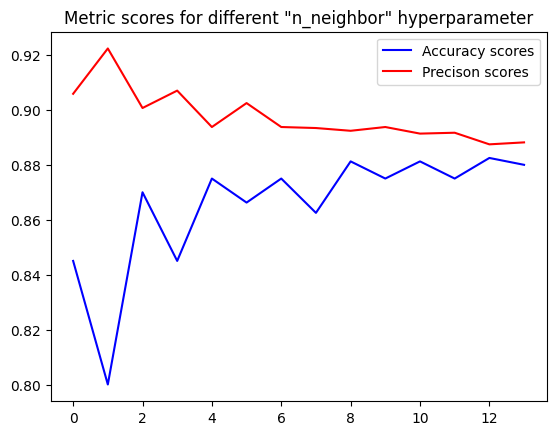

In [91]:
acc_scores = [item[0] for item in table]
prc_scores = [item[1] for item in table]

plt.plot(acc_scores, color='blue', label='Accuracy scores')  
plt.plot(prc_scores, color='red', label='Precison scores')   
plt.legend()
plt.title('Metric scores for different "n_neighbor" hyperparameter')

plt.show()